In [7]:
# INSTALACIONES

!pip install textblob
!python -m textblob.download_corpora
!python -m spacy download es_core_news_sm
!pip install googletrans==4.0.0-rc1

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_re

     ---------------------------------------- 12.9/12.9 MB 1.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 55.1/55.1 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 133.4/133.4 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 65.0/65.0 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17411 sha256=ccd02011f4bb5b70054b8f278796f79f8ec6ad27fe59651f7af5885843

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Primeros 500 caracteres del texto extraído:

La transformación digital: estrategia generadora  
de cambios en las organizaciones
Digital transformation: a strategy that generates changes in organizations
Recibido: diciembre 2022
Evaluado: enero 2023
Aprobado: marzo 2023
Julián Miranda-Torrez1
Universidad Autónoma de Guerrero, Mexico
Orcid: 0000-0001-9402-5628
RESUMEN
Introducción: Las investigaciones sobre la transformación digital y la digitalización esta 
fragmentada, en la actualidad tiene una amplia aplicación práctica en las organizac

Total de frases: 464
Total de palabras: 11455

Palabras luego de remover stopwords: 5127


<Figure size 1000x500 with 0 Axes>

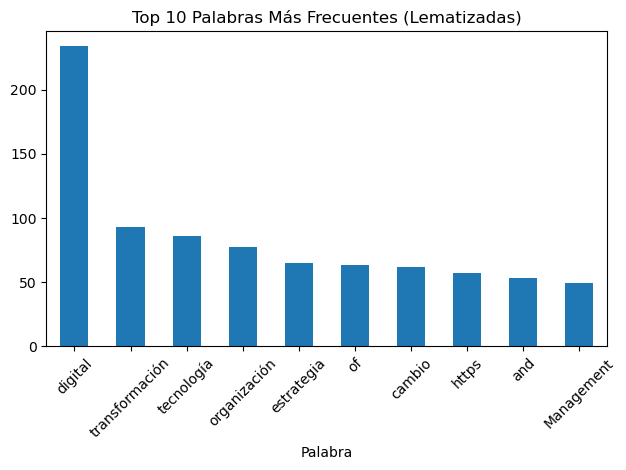


Distribución de categorías gramaticales (POS):
PROPN    1692
NOUN     1415
ADJ      1248
VERB      583
ADP        64
DET        48
ADV        36
AUX        25
NUM        13
SCONJ       2
Name: POS, dtype: int64

TF-IDF Vectorization sobre primeras 10 oraciones (preprocesadas):
   academy  actualidad  administracion    agenda      alto    amplia  \
0      0.0    0.144505             0.0  0.000000  0.000000  0.144505   
1      0.0    0.000000             0.0  0.179943  0.000000  0.000000   
2      0.0    0.000000             0.0  0.000000  0.333333  0.000000   
3      0.0    0.000000             0.0  0.315156  0.000000  0.000000   
4      0.0    0.000000             0.0  0.000000  0.000000  0.000000   

     amplio  análisis  aplicación  aprobado  ...  sostenibilidad  strategy  \
0  0.000000  0.000000    0.122843  0.144505  ...             0.0  0.122843   
1  0.211675  0.000000    0.179943  0.000000  ...             0.0  0.000000   
2  0.000000  0.333333    0.000000  0.000000  ...      

In [9]:
# --- INSTALACIÓN NECESARIA ---
# Solo ejecutar una vez en Jupyter Lab si aún no están instaladas:
# !pip install spacy textblob googletrans==4.0.0-rc1
# !python -m spacy download es_core_news_sm

# --- IMPORTACIONES ---
import fitz  # PyMuPDF
import nltk
import spacy
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from googletrans import Translator
from textblob import TextBlob

# --- DESCARGA DE RECURSOS NLP ---
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("es_core_news_sm")  # Modelo de spaCy para español

# --- CARGA DEL PDF LOCAL ---
pdf_path = r"C:\Users\Usuario\OneDrive\Escritorio\Varios\CURSOS\Carrera en Data Scientist\Curso 4. Data Science III -\Dialnet-LaTransformacionDigital-9425237.pdf"
doc = fitz.open(pdf_path)
text_data = ""
for page in doc:
    text_data += page.get_text()

print("Primeros 500 caracteres del texto extraído:\n")
print(text_data[:500])

# --- TOKENIZACIÓN ---
sentences = sent_tokenize(text_data, language="spanish")
words = word_tokenize(text_data, language="spanish")

print(f"\nTotal de frases: {len(sentences)}")
print(f"Total de palabras: {len(words)}")

# --- LIMPIEZA Y STOPWORDS ---
stop_words = set(stopwords.words('spanish'))
filtered_words = [w for w in words if w.lower() not in stop_words and w.isalpha()]
print(f"\nPalabras luego de remover stopwords: {len(filtered_words)}")

# --- LEMATIZACIÓN CON SPACY ---
doc_spacy = nlp(" ".join(filtered_words))
lemmatized = [token.lemma_ for token in doc_spacy if not token.is_stop and token.is_alpha]

# --- POS TAGGING ---
pos_data = [(token.text, token.pos_) for token in doc_spacy if token.is_alpha]
pos_df = pd.DataFrame(pos_data, columns=["Palabra", "POS"])

# --- FRECUENCIA DE PALABRAS LEMATIZADAS ---
freq = Counter(lemmatized)
freq_df = pd.DataFrame(freq.items(), columns=["Palabra", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)

# --- VISUALIZACIÓN DE PALABRAS MÁS FRECUENTES ---
plt.figure(figsize=(10,5))
freq_df.head(10).plot(kind="bar", x="Palabra", y="Frecuencia", legend=False)
plt.title("Top 10 Palabras Más Frecuentes (Lematizadas)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- DISTRIBUCIÓN DE POS ---
print("\nDistribución de categorías gramaticales (POS):")
print(pos_df['POS'].value_counts().head(10))

# --- TF-IDF DE FRASES ---
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower().strip()

clean_sentences = [clean_text(s) for s in sentences[:10]]
spanish_stopwords = stopwords.words('spanish')
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X_tfidf = vectorizer.fit_transform(clean_sentences)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Vectorization sobre primeras 10 oraciones (preprocesadas):")
print(df_tfidf.head())

# --- ANÁLISIS DE SENTIMIENTO CON googletrans ---
translator = Translator()
print("\nAnálisis de polaridad de frases (traducidas con googletrans):")
for i, sent in enumerate(sentences[:10]):
    try:
        translated_text = translator.translate(sent, dest='en').text
        blob = TextBlob(translated_text)
        print(f"Frase {i+1} (original): {sent.strip()}")
        print(f" → Traducción: {translated_text}")
        print(f" → Polaridad: {blob.sentiment.polarity:.2f}, Subjetividad: {blob.sentiment.subjectivity:.2f}\n")
    except Exception as e:
        print(f"Frase {i+1} no pudo ser traducida. Error: {e}\n")

# --- ANÁLISIS DE UNA FRASE ESPECÍFICA ---
frase_ejemplo = sentences[2]
print(f"\nFrase seleccionada:\n{frase_ejemplo}")
try:
    traducida = translator.translate(frase_ejemplo, dest='en').text
    blob = TextBlob(traducida)
    print(f"Traducción: {traducida}")
    print(f"→ Polaridad: {blob.sentiment.polarity:.2f}")
    print(f"→ Subjetividad: {blob.sentiment.subjectivity:.2f}")
except Exception as e:
    print(f"No se pudo traducir la frase. Error: {e}")
